# Trajectory generator playground

`trajectories` is an useful trajectory generator package made to quickly and handfully generate latent trajectories of a given dimension and givent size.

## Basic shapes
`trajectories` is based on generative callbacks, that have to be initiliazed and then called with a time input. Both time inputs and parameters can be batched, in order to easily generate random trajectories :

(100, 3)


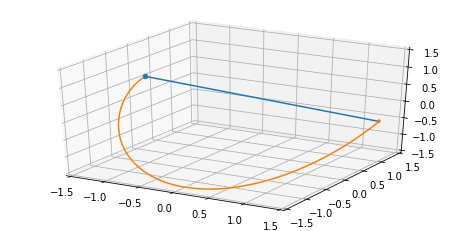

In [1]:
import numpy as np
import trajectories as traj
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
y_start = [-1., -0.5, 1.]
y_end = [1., 2., -1.]
l = traj.Line_(t_range=[0., 1.], y_range=[y_start, y_end], dim=3)
pl = traj.PolarLine_(t_range=[0., 1.], y_range=[y_start, y_end], dim=3)

y = l(t)
yp = pl(t)

print(y.shape)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot(y[..., 0], y[..., 1], y[..., 2])
ax.plot(yp[..., 0], yp[..., 1], yp[..., 2])
ax.scatter(y_start[0], y_start[1], y_start[2], marker="o")
ax.scatter(y_end[0], y_end[1], y_end[2], marker="+")
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
plt.show()


Some random point generation functions are available, in order to easily generate set of trajectories: 

(100, 3)


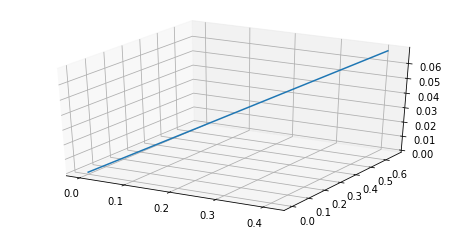

In [2]:
import numpy as np
import trajectories as traj
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
l = traj.Line_(t_range=[0., 1.], y_range=[traj.Origin, traj.Uniform], dim=3)

y = l(t)

print(y.shape)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot(y[..., 0], y[..., 1], y[..., 2])
plt.show()


Current trajectories are : 
- `Line_` : affine lines between given origins
- `PolarLine_` : shperically interpolated lines between given origins
- `Circle_` : embedded circles in higher dimensions
- `Helix_`  : embedded helices in higher dimensions
- `Ellipse_`: multi-dimensional ellipses
- `Uniform_`: uniform noise
- `Normal_`: normal noise
- `RandomWalk_` : random walk

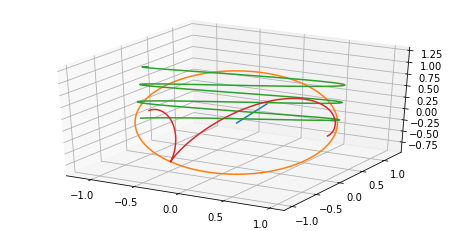

In [3]:
# Global dimensionality can be set to avoid the cumbersome dim=** keyword
traj.GLOBAL_DIM = 3

t = np.linspace(0, 1, 100)
l = traj.Line_(t_range=[0., 1.], y_range=[traj.Origin, traj.Uniform], dim=3)
c = traj.Circle_(t_range=[0, 1], theta_range=[0., 1.])
h = traj.Helix_(t_range=[0., 1.])
ell = traj.Ellipse_(t_range=[0., 1.])

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
y = l(t)
ax.plot(y[..., 0], y[..., 1], y[..., 2])
y = c(t)
ax.plot(y[..., 0], y[..., 1], y[..., 2])
y = h(t)
ax.plot(y[..., 0], y[..., 1], y[..., 2])
y = ell(t)
ax.plot(y[..., 0], y[..., 1], y[..., 2])

plt.show()

## Trajectory composition

Trajectories can be composed in two different manners :  
- algebra : trajectories have a linear algebra structure, i.e. they can be added and multiplied by scalar
- concatenation : the `&` operator allow to easily concatenate trajectories
- composition : parameters arguments can be replaced with `Trajectory_` elements

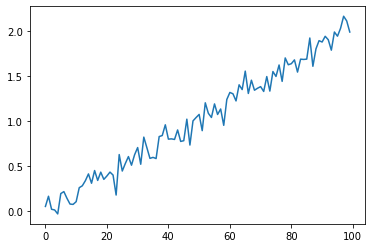

In [4]:
# Global dimensionality can be set to avoid the cumbersome dim=** keyword
traj.GLOBAL_DIM = 1

t = np.linspace(0, 1, 100)
l = traj.Line_(t_range=[0., 1.], y_range=[traj.Origin, [2]], dim=1)
u = traj.Normal_()

# trajectories can be added and scaled together.
c = l + 0.1*u

plt.figure()
plt.plot(c(t))

(100, 1)


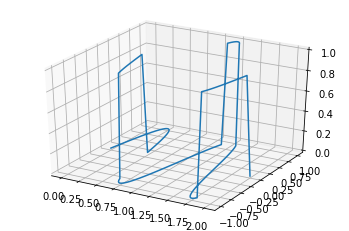

In [5]:
# Global dimensionality can be set to avoid the cumbersome dim=** keyword
traj.GLOBAL_DIM = 3

t = np.linspace(0, 1, 100)
# enforce each trajectory to be 1d
l = traj.Line_(t_range=[0., 1.], y_range=[traj.Origin, [2]], dim=1)
print(l(t).shape)
u = traj.Sin_(freq=2.0, dim=1)
v = traj.Square_(freq=0.33, dim=1)

# concatenate trajectories with & operator
c = l & u & v 


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
y = c(t)
ax.plot(y[..., 0], y[..., 1], y[..., 2])

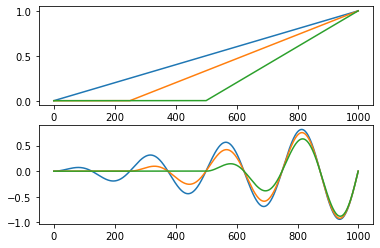

In [6]:
import numpy as np
import trajectories as traj
import matplotlib.pyplot as plt

traj.GLOBAL_DIM=3

# 3 batches
t = np.linspace(-1.0, 1.0, 1000)
amplitude = traj.Line_([[-1., -0.5, 0.0], 1], [0., 1.], out_mode="clamp")
sawtooth = traj.Sin_(freq=2.0, phase=0.0, amplitude=amplitude)
y = sawtooth(t)

fig, ax = plt.subplots(2, 1)
ax[0].plot(amplitude(t))
ax[1].plot(y)

## Batched trajectories

Phases and parameters can be batched in a way that make generation of batched curves straightforward. The rules are, as shown below:
- phases `t` can be of shape `(*batch_dims, traj_len, optional(dim,))` (if an additional dim is specified, the pase are different for each dimension)
- parameters can be of shape `(*batch_dims, optional(dim,))`, such that different parameters can be given whether among batch or dimension axis. Be careful : if the paramter is supposed to be automatically scaled among dimensions, it is adivsed to leave a free dimension `(..., 1)` to prevent ambiguities.

Size of t : (10, 30)
Shape of t0 :  (10, 1)
y shape :  (10, 30, 1)


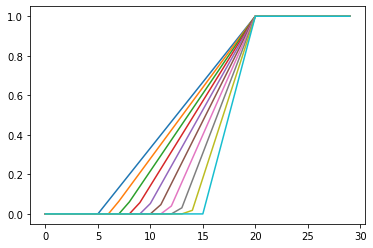

In [7]:
import numpy as np, matplotlib.pyplot as plt
import trajectories as tj

tj.GLOBAL_DIM = 1

n_batches = 10
t = np.array([np.arange(-1, 2, 0.1)] * n_batches)
t0 = np.linspace(-0.5, 0.5, 10)[..., np.newaxis]
y0 = np.zeros((tj.GLOBAL_DIM,))
y1 = np.ones((tj.GLOBAL_DIM,))
print("Size of t :", t.shape)
print("Shape of t0 : ", t0.shape)
line = tj.Line_([t0, 1.0], [y0, y1], out_mode="clamp")
y = line(t)
print("y shape : ", y.shape)

for i in y:
    plt.plot(i)
plt.show()


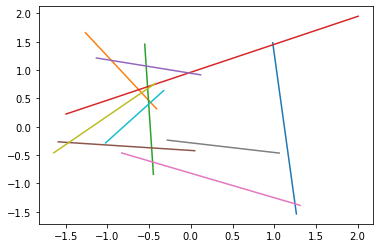

In [8]:
import numpy as np, matplotlib.pyplot as plt
import trajectories as tj

tj.GLOBAL_DIM = 2

n_batches = 10
t = np.array([np.arange(-1, 2, 0.1)] * n_batches)
# We can also directly give matrices as paramters
y0 = np.random.randn(10, tj.GLOBAL_DIM)
y1 = np.random.randn(10, tj.GLOBAL_DIM)
line = tj.Line_([0.0, 1.0], [y0, y1], out_mode="clamp")
y = line(t)

for i in y:
    plt.plot(i[..., 0], i[..., 1])
plt.show()

freq shape:  (4, 1)
phases shape:  (3,)


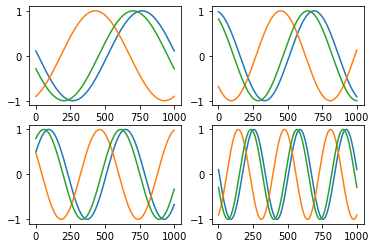

In [9]:
import numpy as np
import trajectories as traj
import matplotlib.pyplot as plt

traj.GLOBAL_DIM=3

# Here frequencies are definied among batches, and phases among dimensions
t = np.array([np.linspace(-1.0, 1.0, 1000)]*4)
freq = np.array([[0.5], [0.7], [0.9], [1.5]])
phases = traj.uniform(3)
print("freq shape: ", freq.shape)
print("phases shape: ", phases.shape)
sawtooth = traj.Sin_(freq=freq, phase=phases)
y = sawtooth(t)

fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        ax[i, j].plot(y[2*i+j])
plt.show()